===========iteration:0===========
AdaGrad:2.0758832295594027
Adam:2.2203799358551413
SGD:2.390613063734306
Momentum:2.3920305064988803
===========iteration:100===========
AdaGrad:0.1840132710958514
Adam:0.277665272945396
SGD:1.5679813816520292
Momentum:0.3494734553815215
===========iteration:200===========
AdaGrad:0.1391470775034675
Adam:0.19366059867954688
SGD:0.815416016177104
Momentum:0.3193029448133048
===========iteration:300===========
AdaGrad:0.10328975773592333
Adam:0.1054885245493996
SGD:0.5476870525085556
Momentum:0.2072324964276804
===========iteration:400===========
AdaGrad:0.07616005621537136
Adam:0.08215194704082734
SGD:0.4153701488913891
Momentum:0.1665568824173716
===========iteration:500===========
AdaGrad:0.05461248483150753
Adam:0.08357427522683698
SGD:0.38207546790310404
Momentum:0.11233205783676581
===========iteration:600===========
AdaGrad:0.042530254516311754
Adam:0.07109933853495229
SGD:0.36294870407561597
Momentum:0.16204165760206987
===========iteration:700==

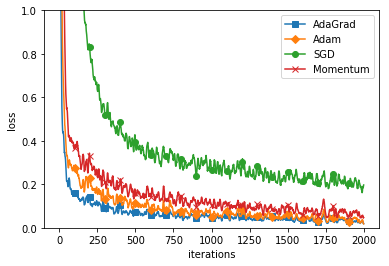

In [2]:
import os
import sys
sys.path.append(os.pardir)  
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
